In [1]:
from sklearn import tree
import random
import numpy as np
import graphviz
import os
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

In [7]:
# Sample sizes
n = 10000
n2 = 1000

# Data
Y_temp = np.zeros(n)
X = []

# Reference Points
avg_heart = 80
avg_temp = 36

In [8]:
# Data generation
for i in range(0, n):
    X.append([random.gauss(avg_temp, 0.2), random.gauss(avg_heart, 10)])

for j in range(0, n2):
    X.append([random.gauss(avg_temp + 0.7, 0.2), random.gauss(avg_heart + 12, 10)])

Y = np.append(Y_temp, np.ones(n2))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
clf = tree.DecisionTreeClassifier(random_state=42)

parameters = {"max_depth": [2,4,6,8,10,12],"min_samples_leaf": [2,4,6,8,10,12], "min_samples_split": [2,4,6,8,10,12]}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X, Y)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Plot the new model.
#plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.9204244031830239
The testing F1 Score is 0.8975609756097561


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

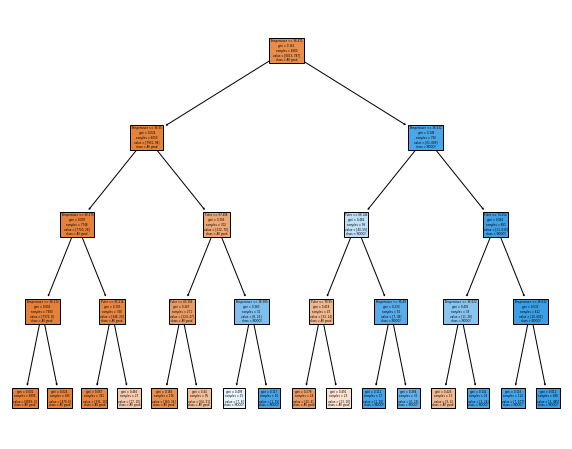

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
tree.plot_tree(best_clf, feature_names=["Temperature", "Pulse"], filled=True,
         class_names=["All good", "NOOO!"]);